<a href="https://colab.research.google.com/github/tlinhnguyen2308/ANN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
#tao kenh
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#32 la tich chap,
model.add(MaxPooling2D((2,2)))
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model=Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),#1 la kenh
MaxPooling2D(2,2),
Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),
Conv2D(64,(3,3),activation='relu'),
Flatten(),
Dense(64,activation='relu'),
Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#bien dich
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9905 - val_loss: 0.0351
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9893 - val_loss: 0.0466
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9900 - val_loss: 0.0377
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9903 - val_loss: 0.0380
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9916 - val_loss: 0.0364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0082 - val_accuracy: 0.9905 - val_loss: 0.0459
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9976 - loss: 0.00

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


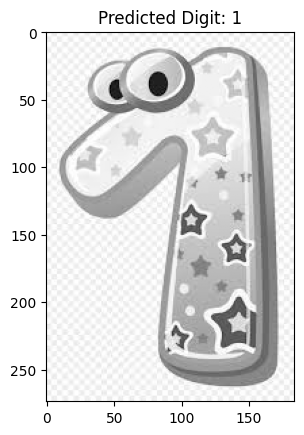

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
def preprocess_image(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28, 28))
  img = cv2.bitwise_not(img)
  img = img.astype('float32') / 255
  return img

def predict_digit(mage_path):
  img = preprocess_image(image_path)
  img = img.reshape(1, 28, 28, 1)
  prediction = model.predict(img)
  img = cv2.bitwise_not(img)
  predicted_digit = np.argmax(prediction)
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.title(f'Predicted Digit: {predicted_digit}')
  plt.show()
  return predicted_digit

image_path = '/content/so1.jpg'
predicted_digit = predict_digit(image_path)

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
from keras.models import Sequential
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',padding="same",input_shape=(32,32,3)),
    Conv2D(32,(3,3),activation='relu',padding="same"),MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu',padding="same"),
    Conv2D(64,(3,3),activation='relu',padding="same"),MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding="same"),
    Conv2D(128,(3,3),activation='relu',padding="same"),MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(10,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 2), output.shape=(None, 10)

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
from tensorflow import keras
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D

# Now redefine your model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',padding="same",input_shape=(32,32,3)),
    Conv2D(32,(3,3),activation='relu',padding="same"),MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu',padding="same"),
    Conv2D(64,(3,3),activation='relu',padding="same"),MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding="same"),
    Conv2D(128,(3,3),activation='relu',padding="same"),MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(10,activation='softmax') # Output layer with 10 units for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7832 - loss: 0.6435 - val_accuracy: 0.7443 - val_loss: 0.7892
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7956 - loss: 0.5941 - val_accuracy: 0.7293 - val_loss: 0.8367
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8110 - loss: 0.5652 - val_accuracy: 0.7421 - val_loss: 0.8142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8168 - loss: 0.5415 - val_accuracy: 0.7484 - val_loss: 0.8014
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8253 - loss: 0.5187 - val_accuracy: 0.7410 - val_loss: 0.8079
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8351 - loss: 0.4901 - val_accuracy: 0.7453 - val_loss: 0.8500
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8423 - loss: 0.4745 - val_accuracy: 0.7390 - val_loss: 0.8305
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8485 - loss: 0.4536

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Tiên đoán là: 5


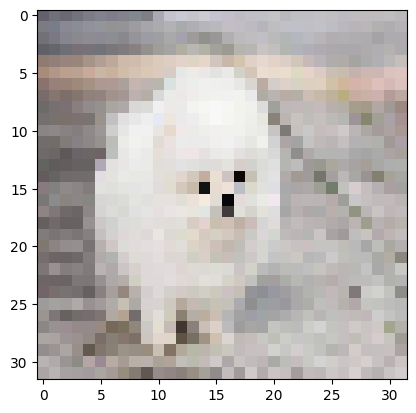

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
import numpy as np
dv='/content/cún con.jpg'
img=load_img(dv, target_size=(32, 32))
plt.imshow(img)
img_array=img_to_array(img)/255
img_flatten=img_array.reshape(1, 32, 32, 3)
prediction=model.predict(img_flatten)
print('Tiên đoán là:', np.argmax(prediction))